***Install Required Libraries***

In [1]:
!pip install opencv-python-headless --quiet

***Import Required Libraries***

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

***Upload an Image***

In [3]:
uploaded = files.upload()

Saving original image.jpg to original image.jpg


***Display Image***

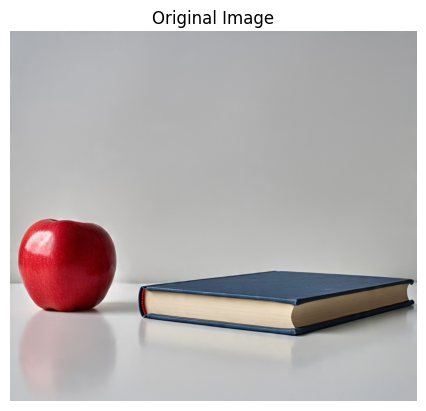

In [4]:
for file in uploaded:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image_name = file


plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

***Read and Show the Uploaded Image***

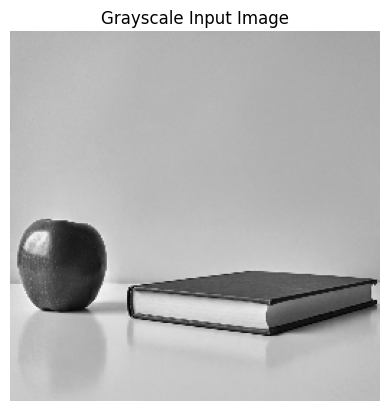

In [6]:
img = cv2.imread(next(iter(uploaded)), cv2.IMREAD_GRAYSCALE)

# Resize for consistency
img = cv2.resize(img, (256, 256))


plt.imshow(img, cmap='gray')
plt.title("Grayscale Input Image")
plt.axis('off')
plt.show()

# **Task 1: Add Gaussian Noise and Apply Otsu's Thresholding**

***Add Gaussian Noise***

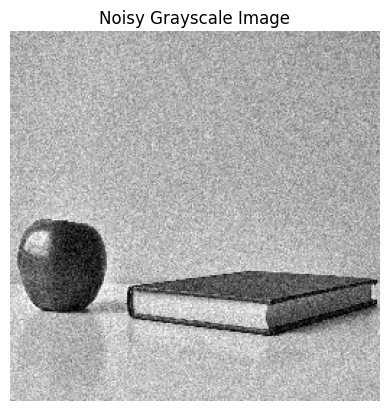

In [7]:
mean = 0
stddev = 20

# Generate noise and add it
gauss = np.random.normal(mean, stddev, img.shape).astype(np.float32)
noisy_img = img.astype(np.float32) + gauss

# Clip and convert to uint8
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)


plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy Grayscale Image")
plt.axis('off')
plt.show()


***Otsu's Thresholding***

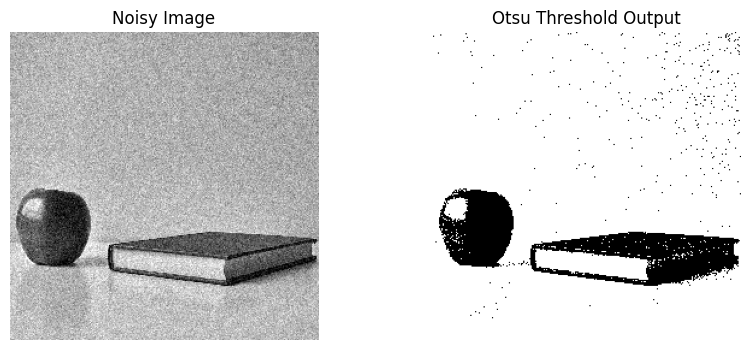

In [8]:
# noisy_img is CV_8UC1 => Otsu will work
_, otsu_output = cv2.threshold(noisy_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Compare noisy and thresholded
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(noisy_img, cmap='gray')
axes[0].set_title("Noisy Image")
axes[0].axis('off')

axes[1].imshow(otsu_output, cmap='gray')
axes[1].set_title("Otsu Threshold Output")
axes[1].axis('off')

plt.show()




# **Task 2: Region Growing Algorithm for Image Segmentation**

***Implement Region Growing***

In [9]:
def region_growing(img, seeds, threshold=15):
    h, w = img.shape
    segmented = np.zeros_like(img, dtype=np.uint8)
    visited = np.zeros_like(img, dtype=bool)

    for seed in seeds:
        x, y = seed
        region_val = img[x, y]
        stack = [(x, y)]

        while stack:
            i, j = stack.pop()
            if visited[i, j]:
                continue
            visited[i, j] = True

            if abs(int(img[i, j]) - int(region_val)) <= threshold:
                segmented[i, j] = 255
                # 8-connected neighbors
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        nx, ny = i + dx, j + dy
                        if 0 <= nx < h and 0 <= ny < w:
                            if not visited[nx, ny]:
                                stack.append((nx, ny))

    return segmented


***Run Region Growing with Seeds***

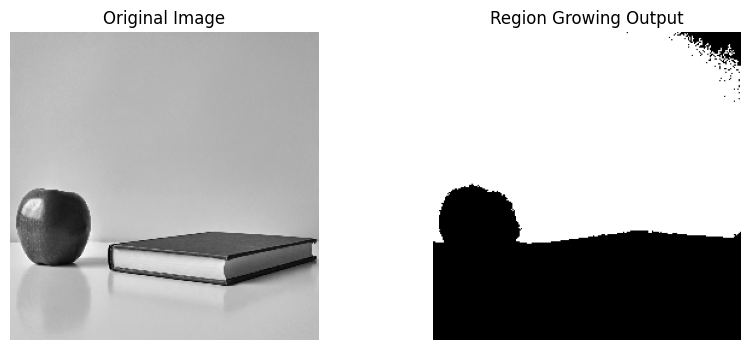

In [10]:

seeds = [(130, 130), (60, 60)]  # Adjust based on image

# Run region-growing
region_result = region_growing(img, seeds, threshold=20)


fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(region_result, cmap='gray')
axs[1].set_title("Region Growing Output")
axs[1].axis('off')
plt.show()


